### 3.4.1 学習コードの実装

In [1]:
include("../common/trainer.jl")
include("../common/optimizer.jl")
include("./simple_cbow.jl")
include("../common/util.jl")

convert_one_hot (generic function with 1 method)

In [2]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

1000

In [3]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

([1, 2, 3, 4, 5, 2, 6, 7], Dict{Any,Any}("say" => 2,"goodbye" => 3,"you" => 1,"hello" => 6,"." => 7,"and" => 4,"i" => 5), Dict{Any,Any}(7 => ".",4 => "and",2 => "say",3 => "goodbye",5 => "i",6 => "hello",1 => "you"))

In [4]:
vocab_size = length(word_to_id)
contexts, target = create_context_target(corpus, window_size=1)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

6×2×7 Array{Int32,3}:
[:, :, 1] =
 1  0
 0  0
 0  0
 0  0
 0  0
 0  0

[:, :, 2] =
 0  0
 1  0
 0  0
 0  1
 0  0
 1  0

[:, :, 3] =
 0  1
 0  0
 1  0
 0  0
 0  0
 0  0

[:, :, 4] =
 0  0
 0  1
 0  0
 1  0
 0  0
 0  0

[:, :, 5] =
 0  0
 0  0
 0  1
 0  0
 1  0
 0  0

[:, :, 6] =
 0  0
 0  0
 0  0
 0  0
 0  1
 0  0

[:, :, 7] =
 0  0
 0  0
 0  0
 0  0
 0  0
 0  1

In [5]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

Trainer(SimpleCBOW(MatMul([[-0.0005232044019038525 0.004686347767687617 … 0.004439528335632189 0.01177056663563286; -0.012185323796822712 0.01179222487723817 … 0.016986976863895414 -0.015556260006688995; … ; 0.003945866720034458 0.0206434273328798 … -0.021069046391568196 0.009979256959689242; 0.010043967469756025 -0.009389097642082712 … 0.00698878550162744 -0.0014460173310302594]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[-0.0005232044019038525 0.004686347767687617 … 0.004439528335632189 0.01177056663563286; -0.012185323796822712 0.01179222487723817 … 0.016986976863895414 -0.015556260006688995; … ; 0.003945866720034458 0.0206434273328798 … -0.021069046391568196 0.009979256959689242; 0.010043967469756025 -0.009389097642082712 … 0.00698878550162744 -0.0014460173310302594]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[0.006196789976300456 0.007116273875418925 … -0.0200661

In [6]:
fit!(trainer, contexts, target, max_epoch=max_epoch, batch_size=batch_size)

| epoch 0 | iter 1 / 2 | loss 5.84
| epoch 0 | iter 2 / 2 | loss 5.84
| epoch 10 | iter 2 / 2 | loss 5.84
| epoch 20 | iter 1 / 2 | loss 5.83
| epoch 20 | iter 2 / 2 | loss 5.82
| epoch 30 | iter 2 / 2 | loss 5.82
| epoch 40 | iter 1 / 2 | loss 5.8
| epoch 40 | iter 2 / 2 | loss 5.78
| epoch 50 | iter 2 / 2 | loss 5.75
| epoch 60 | iter 1 / 2 | loss 5.7
| epoch 60 | iter 2 / 2 | loss 5.67
| epoch 70 | iter 2 / 2 | loss 5.62
| epoch 80 | iter 1 / 2 | loss 5.54
| epoch 80 | iter 2 / 2 | loss 5.53
| epoch 90 | iter 2 / 2 | loss 5.44
| epoch 100 | iter 1 / 2 | loss 5.38
| epoch 100 | iter 2 / 2 | loss 5.29
| epoch 110 | iter 2 / 2 | loss 5.25
| epoch 120 | iter 1 / 2 | loss 5.1
| epoch 120 | iter 2 / 2 | loss 5.05
| epoch 130 | iter 2 / 2 | loss 4.98
| epoch 140 | iter 1 / 2 | loss 4.82
| epoch 140 | iter 2 / 2 | loss 4.76
| epoch 150 | iter 2 / 2 | loss 4.78
| epoch 160 | iter 1 / 2 | loss 4.49
| epoch 160 | iter 2 / 2 | loss 3.99
| epoch 170 | iter 2 / 2 | loss 4.54
| epoch 180 | iter 1 

In [7]:
using Plots
gr()

Plots.GRBackend()

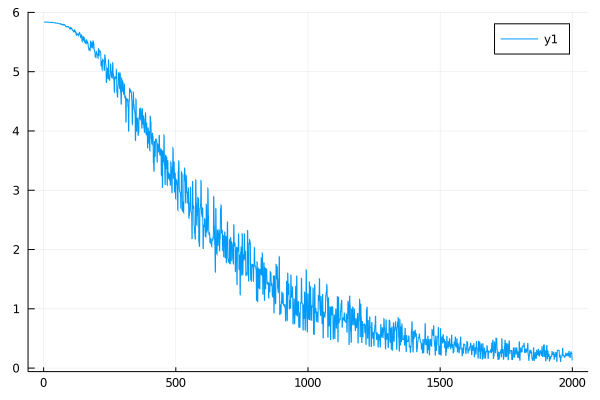

In [8]:
plot(trainer.loss_list)